In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split,GridSearchCV,LeaveOneOut,cross_val_score,KFold

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,confusion_matrix

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize']=[10,5]

In [3]:
data = pd.read_csv(r"C:\Users\admin\Downloads\IPL_IMB_data.csv")

data.head()

,PLAYER NAME,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
0,"Abdulla, YA",2,SA,Allrounder,0,0,0,0.00,0,0.0,...,0,0.00,0.00,0,307,15,20.47,8.90,13.93,50000
1,Abdur Razzak,2,BAN,Bowler,214,18,657,71.41,185,37.6,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,50000
2,"Agarkar, AB",2,IND,Bowler,571,58,1269,80.62,288,32.9,...,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,350000
3,"Ashwin, R",1,IND,Bowler,284,31,241,84.56,51,36.8,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,850000
4,"Badrinath, S",2,IND,Batsman,63,0,79,45.93,0,0.0,...,71,32.93,120.71,28,0,0,0.00,0.00,0.00,800000


In [4]:
data.shape

(130, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   PLAYING ROLE   130 non-null    object 
 4   T-RUNS         130 non-null    int64  
 5   T-WKTS         130 non-null    int64  
 6   ODI-RUNS-S     130 non-null    int64  
 7   ODI-SR-B       130 non-null    float64
 8   ODI-WKTS       130 non-null    int64  
 9   ODI-SR-BL      130 non-null    float64
 10  CAPTAINCY EXP  130 non-null    int64  
 11  RUNS-S         130 non-null    int64  
 12  HS             130 non-null    int64  
 13  AVE            130 non-null    float64
 14  SR-B           130 non-null    float64
 15  SIXERS         130 non-null    int64  
 16  RUNS-C         130 non-null    int64  
 17  WKTS           130 non-null    int64  
 18  AVE-BL    

Text(0.5, 1.0, 'visualizing the not null data')

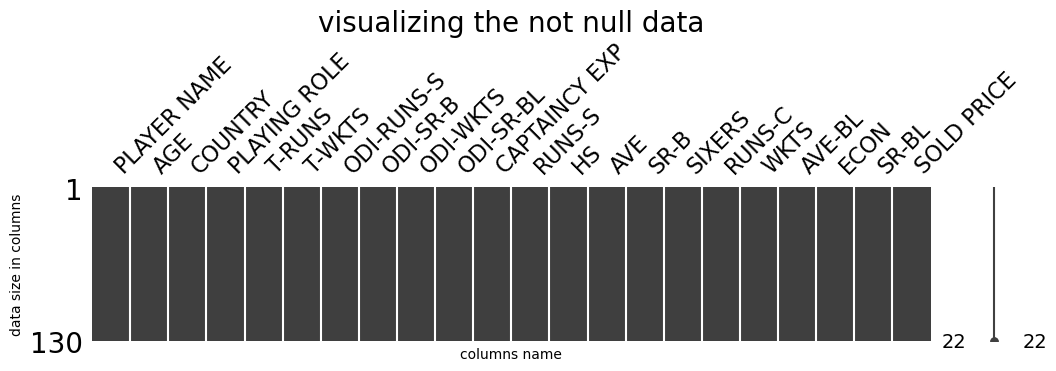

In [6]:
import missingno as mn
mn.matrix(data,figsize=(12,2))
plt.xlabel("columns name",fontdict={"fontsize":10})
plt.ylabel("data size in columns",fontdict={"fontsize":10})
plt.title("visualizing the not null data",fontdict={"fontsize":20})

In [7]:
data.describe()   

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,SOLD PRICE
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,47.430769,18.719308,111.053462,17.692308,475.523077,17.169231,23.110231,6.204462,17.382615,5.212231e+05
std,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,36.403624,11.094224,35.928907,23.828146,558.314049,21.816763,20.802057,4.941531,15.273422,4.068074e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04
25%,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,16.000000,9.825000,98.237500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.250000e+05
50%,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,35.500000,18.635000,118.510000,6.000000,297.000000,8.500000,24.785000,7.380000,19.935000,4.375000e+05
75%,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,73.750000,27.872500,129.102500,29.750000,689.250000,23.750000,35.580000,8.247500,26.212500,7.000000e+05
max,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,158.000000,50.110000,235.490000,129.000000,1975.000000,83.000000,126.300000,38.110000,100.200000,1.800000e+06


In [8]:
data.dtypes  

PLAYER NAME       object
AGE                int64
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP      int64
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [9]:
data["AGE"] = data["AGE"].astype("object")
data["CAPTAINCY EXP"] = data["CAPTAINCY EXP"].astype("object")

In [10]:
data.dtypes

PLAYER NAME       object
AGE               object
COUNTRY           object
PLAYING ROLE      object
T-RUNS             int64
T-WKTS             int64
ODI-RUNS-S         int64
ODI-SR-B         float64
ODI-WKTS           int64
ODI-SR-BL        float64
CAPTAINCY EXP     object
RUNS-S             int64
HS                 int64
AVE              float64
SR-B             float64
SIXERS             int64
RUNS-C             int64
WKTS               int64
AVE-BL           float64
ECON             float64
SR-BL            float64
SOLD PRICE         int64
dtype: object

In [11]:
data = data.drop(["PLAYER NAME"],axis=1)

In [12]:
# calculating the missing values
missing = data.isnull().sum().sort_values(ascending=True)
percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=True)

missing_datas = pd.concat([missing,percent],axis=1,keys=["missing","peercent of missing"])
missing_datas

,missing,peercent of missing
AGE,0,0.0
ECON,0,0.0
AVE-BL,0,0.0
WKTS,0,0.0
RUNS-C,0,0.0
SIXERS,0,0.0
SR-B,0,0.0
AVE,0,0.0
HS,0,0.0
SR-BL,0,0.0


In [13]:
dependent = data["SOLD PRICE"] 
independent = data.drop(["SOLD PRICE"],axis=1)

In [14]:
data_num = independent.select_dtypes(include = np.number)

In [15]:
data_num.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL'],
      dtype='object')

In [16]:
data_cat = independent.select_dtypes(include = object)

In [17]:
data_cat.columns

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'], dtype='object')

In [18]:
dummy = pd.get_dummies(data=data_cat,columns = data_cat.columns,drop_first=True)

In [19]:
dummy.head()

,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [20]:
x_scaler = StandardScaler()

num_scale = x_scaler.fit_transform(data_num)

sdata_num = pd.DataFrame(data=num_scale,columns=data_num.columns)

y = (dependent - dependent.mean()) / dependent.std()

In [21]:
x = pd.concat([sdata_num,dummy],axis=1)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [23]:
x_train.shape,y_train.shape

((104, 31), (104,))

In [24]:
x_test.shape,y_test.shape

((26, 31), (26,))

In [25]:
def train_rmse_model(model):
    
    train_pred = model.predict(x_train)
    
    train_mse = mean_squared_error(y_train,train_pred)
    
    train_rmse = round(np.sqrt(train_mse),4)
    
    
    return train_rmse

In [26]:
def test_rmse_model(model):
    
    test_pred = model.predict(x_test)
    
    test_mse = mean_squared_error(y_test,test_pred)
    
    test_rmse = round(np.sqrt(test_mse),4)
    
    
    return test_rmse

In [27]:
def get_r2score(model):
    
    r2 = model.score(x_train,y_train)
    
    n= x_train.shape[0]
    
    k= x_train.shape[1]
    
    r2_adj = 1 - ((1-r2)*(n-1)/(n-k-1))
    
    return ([r2 , r2_adj])
    

In [28]:
pd.__version__

'2.0.3'

In [29]:
score_card = pd.DataFrame(columns=["model_name","alpha","l1_ratio","r2","adj r2","test_rmse"])


def updatecard(algo_name,model,alpha = '-',ratio ='-'):
    global score_card
    
    score_card.loc[len(score_card)] = {
        "model_name" : algo_name,
        "alpha":alpha,
        "l1_ratio":ratio,
        "test_rmse":test_rmse_model(model),
        "r2":get_r2score(model)[0],
        "adj r2":get_r2score(model)[1]
    }

In [30]:
linreg = LinearRegression()

mlr_model = linreg.fit(x_train,y_train)

mlr_model.score(x_train,y_train)

0.5538424305356855

In [31]:
lrtr=train_rmse_model(linreg)
lrte=test_rmse_model(linreg)
print("train set of rmse ",lrtr)
print("test set of rmse ",lrte)
print("diff b/w the train and test ",np.abs(lrtr-lrte))

train set of rmse  0.6794
test set of rmse  0.7486
diff b/w the train and test  0.06920000000000004


In [32]:
updatecard(algo_name = "Linear Reegression",model = linreg)

In [33]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486


In [34]:
# ridge alpha 1

ridge = Ridge(alpha =1, max_iter = 500)
ridge.fit(x_train,y_train)

print("RMSE of test set",test_rmse_model(ridge))

RMSE of test set 0.7257


In [35]:
updatecard(algo_name = "Ridge Regressin alpha = 1",model = ridge,alpha =1)

In [36]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257


In [37]:
# ridge alpha 2

ridge = Ridge(alpha =2, max_iter = 500)
ridge.fit(x_train,y_train)

print("RMSE of test set",test_rmse_model(ridge))

RMSE of test set 0.718


In [38]:
updatecard(algo_name = "Ridge Regressin alpha = 2",model = ridge,alpha =2)

In [39]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180


In [40]:
def plot_coefficients(model,algo_names):
    
    df_coeff = pd.DataFrame({"variable" : x.columns,"coefficient" : model.coef_})
    sorted_coeff = df_coeff.sort_values("coefficient",ascending=True)
    sns.barplot(x="coefficient",y="variable",data=sorted_coeff)
    plt.xlabel("coefficient of {}".format(algo_names),fontsize=15)
    plt.ylabel("feature",fontsize=15)
    plt.show()

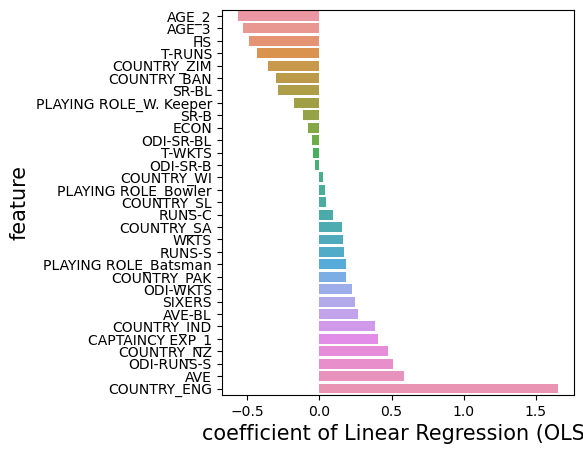

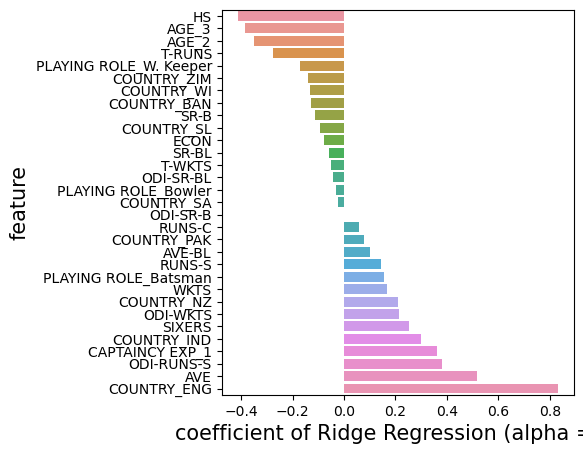

<Figure size 1000x500 with 0 Axes>

In [41]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,1)
plot_coefficients(mlr_model, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [42]:
lasso=Lasso(alpha=0.01,max_iter = 500)
lasso.fit(x_train,y_train)

print("rmse of test set",test_rmse_model(lasso))

rmse of test set 0.7294


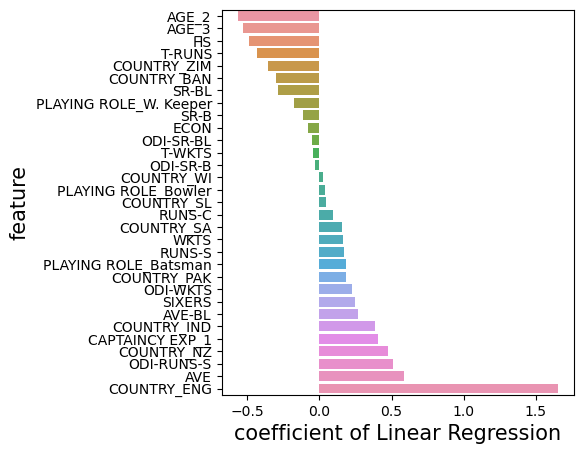

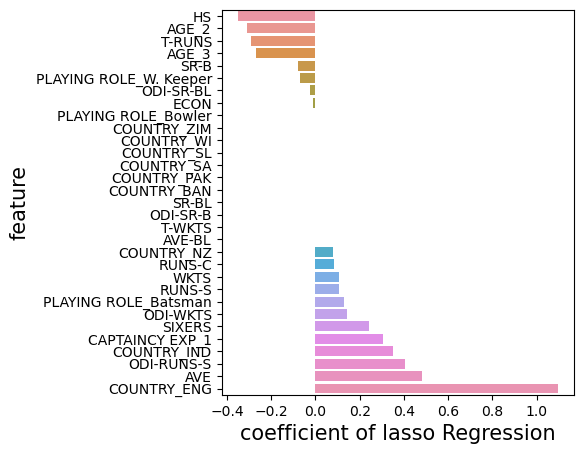

<Figure size 1000x500 with 0 Axes>

In [43]:
plt.subplot(1,2,1)
plot_coefficients(mlr_model, "Linear Regression")
plt.subplot(1,2,2)
plot_coefficients(lasso, "lasso Regression")
plt.tight_layout()
plt.show()

In [44]:
updatecard(algo_name = "lasso Regressin",model = lasso,alpha=0.01) 

In [45]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180
3,lasso Regressin,0.01,-,0.523346,0.318120,0.7294


In [46]:
lasso_data = pd.DataFrame({"variable":x.columns,"coeff":lasso.coef_})

In [47]:
lasso_data.variable[lasso_data.coeff==0].to_list()

['T-WKTS',
 'ODI-SR-B',
 'AVE-BL',
 'SR-BL',
 'COUNTRY_BAN',
 'COUNTRY_PAK',
 'COUNTRY_SA',
 'COUNTRY_SL',
 'COUNTRY_WI',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Bowler']

In [48]:
# elastic Net

In [49]:
net = ElasticNet(alpha = 0.1,l1_ratio=0.01,max_iter=500)
net.fit(x_train,y_train)
print("test set of RMSE",test_rmse_model(net))

test set of RMSE 0.7007


In [50]:
updatecard(algo_name="ElasticNet Regression",model = net,alpha=0.1,ratio=0.01)

In [51]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180
3,lasso Regressin,0.01,-,0.523346,0.318120,0.7294
4,ElasticNet Regression,0.1,0.01,0.464257,0.233590,0.7007


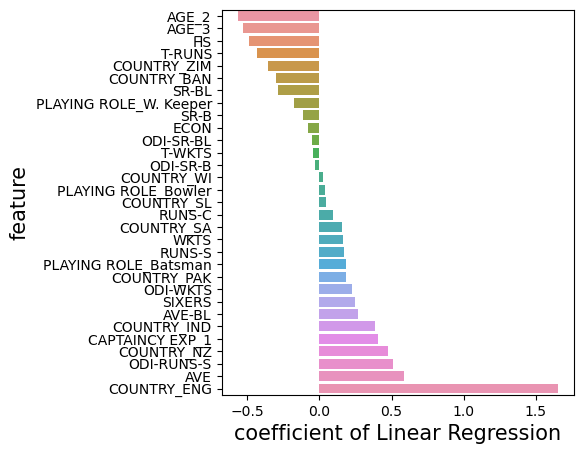

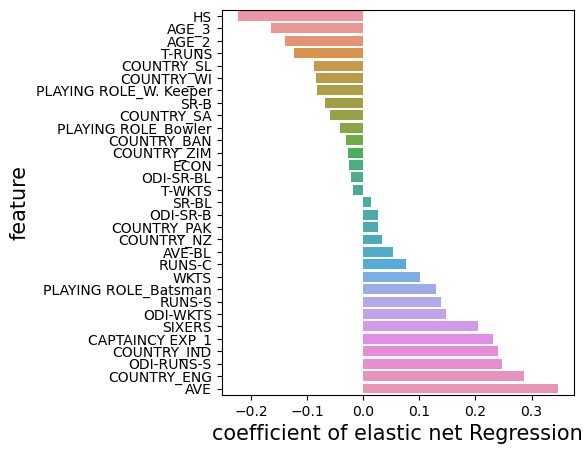

<Figure size 1000x500 with 0 Axes>

In [52]:
plt.subplot(1,2,1)
plot_coefficients(mlr_model,"Linear Regression")
plt.subplot(1,2,2)
plot_coefficients(net,"elastic net Regression")
plt.tight_layout()
plt.show()

In [53]:
# grid search Cv

In [54]:
tuned_paramater = [{"alpha":[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge_grid = GridSearchCV(estimator = ridge,
                         param_grid =tuned_paramater,
                         cv=10)
ridge_grid.fit(x_train,y_train)

print("best paramater for ridge regression",ridge_grid.best_params_,)

print("test set of rmse",test_rmse_model(ridge_grid))

best paramater for ridge regression {'alpha': 100}
test set of rmse 0.7272


In [55]:
updatecard(algo_name = "ridge grid",model = ridge_grid,
          alpha = ridge_grid.best_params_.get('alpha'))

In [56]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180
3,lasso Regressin,0.01,-,0.523346,0.318120,0.7294
4,ElasticNet Regression,0.1,0.01,0.464257,0.233590,0.7007
5,ridge grid,100,-,0.319908,0.027091,0.7272


In [57]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]

lasso_grid = GridSearchCV(estimator = lasso,
                         param_grid = tuned_paramaters,
                         cv =10)

lasso_grid.fit(x_train,y_train)

print("best paramaters of lasso grid",lasso_grid.best_params_,)
print("test set of rmse", test_rmse_model(lasso_grid))

best paramaters of lasso grid {'alpha': 0.1}
test set of rmse 0.7792


In [58]:
updatecard(algo_name = "lasso grid",model = lasso_grid,
          alpha = lasso_grid.best_params_.get('alpha'))

In [59]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180
3,lasso Regressin,0.01,-,0.523346,0.318120,0.7294
4,ElasticNet Regression,0.1,0.01,0.464257,0.233590,0.7007
5,ridge grid,100,-,0.319908,0.027091,0.7272
6,lasso grid,0.1,-,0.277954,-0.032927,0.7792


In [60]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

elastic_grid = GridSearchCV(estimator = net,
                           param_grid = tuned_paramaters,
                           cv=10)
elastic_grid.fit(x_train,y_train)

print("best paramater of elastic grid",elastic_grid.best_params_,)
print("test set of rmse",test_rmse_model(elastic_grid))

best paramater of elastic grid {'alpha': 1, 'l1_ratio': 0.01}
test set of rmse 0.7354


In [61]:
updatecard(algo_name = "elastic net grid",model = elastic_grid,
          alpha = elastic_grid.best_params_.get('alpha'),
          ratio = elastic_grid.best_params_.get('l1_ratio'))

In [62]:
score_card

,model_name,alpha,l1_ratio,r2,adj r2,test_rmse
0,Linear Reegression,-,-,0.553842,0.361747,0.7486
1,Ridge Regressin alpha = 1,1,-,0.544749,0.348739,0.7257
2,Ridge Regressin alpha = 2,2,-,0.532729,0.331543,0.7180
3,lasso Regressin,0.01,-,0.523346,0.318120,0.7294
4,ElasticNet Regression,0.1,0.01,0.464257,0.233590,0.7007
5,ridge grid,100,-,0.319908,0.027091,0.7272
6,lasso grid,0.1,-,0.277954,-0.032927,0.7792
7,elastic net grid,1,0.01,0.308785,0.011178,0.7354


In [1]:
# finally we have to choose the least test_rmse and intermdiate r2 score . so this the advance linear regression